In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('social_network_ads.csv')

In [5]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


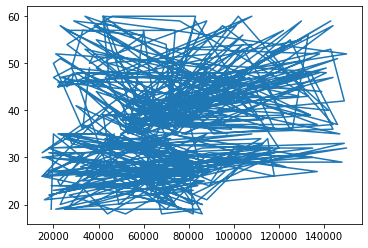

In [6]:
plt.plot(data['EstimatedSalary'],data['Age'])

In [7]:
new_dataset = data.loc[0:10]

In [8]:
new_dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


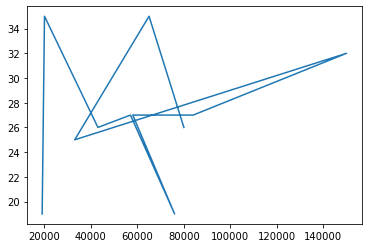

In [9]:
plt.plot(new_dataset['EstimatedSalary'],new_dataset['Age'])

In [10]:
pie_dataset = data.groupby('Gender').size().reset_index(name = 'Purchased')

In [11]:
pie_dataset

,Gender,Purchased
0,Female,204
1,Male,196


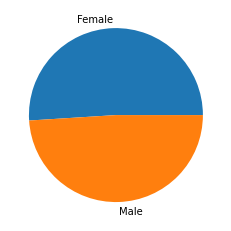

In [12]:
plt.pie(pie_dataset['Purchased'], labels = pie_dataset['Gender'])
plt.show()

In [13]:
scatter_data = data.loc[0:20]

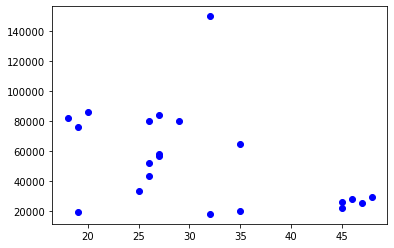

In [14]:
plt.scatter(scatter_data['Age'], scatter_data['EstimatedSalary'], c ="blue")
plt.show()

In [15]:
x = data.loc[0:15]['Age']
y = data.loc[0:15]['EstimatedSalary']
z = data.loc[0:15]['Gender']

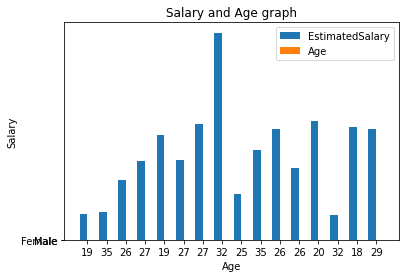

In [16]:
x_new = np.arange(len(x))
plt.bar(x_new - 0.2, y, 0.4, label = 'EstimatedSalary')
plt.bar(x_new + 0.2, z, 0.4, label = 'Age')
  
plt.xticks(x_new, x)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Salary and Age graph")
plt.legend()
plt.show()

In [17]:
#split training and test data
from sklearn.model_selection import train_test_split
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [18]:
print(x.shape,X_train.shape, X_test.shape)

(16,) (360, 2) (40, 2)


In [19]:
#stratify
print(y.mean(),y_train.mean(), y_test.mean())

0.3575 0.375 0.2


In [20]:
# as you see above original data andtrains data have almost similar means
# but original data and test data have different means
# ideally test data must represent similarity to original data
# here we use stratify for y to serve this purpose
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9,test_size = 0.1, stratify = y)
print("X ",x.shape,X_train.shape, X_test.shape)
print("Y means: ",y.mean(),y_train.mean(), y_test.mean())

X  (16,) (360, 2) (40, 2)
Y means:  0.3575 0.35833333333333334 0.35


In [23]:
# our data contains integer values for some columns like avg_glucose_level and bmi
# we have to binarise these values
x_binarised_train = X_train.apply(pd.cut, bins = 2, labels = [0,1])
x_binarised_test = X_test.apply(pd.cut, bins = 2, labels = [0,1])


AttributeError: 'numpy.ndarray' object has no attribute 'apply'